<a href="https://colab.research.google.com/github/YasmineeBa/TAI_TPs/blob/main/TP3_Regression_Log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/AARN/TP3/data.csv', delimiter=',')
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
#un exemplaire de data
print(data[3])

[12.037 17.262  1.   ]


In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2]

y = y.reshape(y.shape[0],1)
print(" Y shape = ",y.shape)
print(" X shape = ",X.shape)
print("X[3] = ",X[3])


 Y shape =  (100, 1)
 X shape =  (100, 3)
X[3] =  [ 1.    12.037 17.262]


# Descente du Gradient : Préparation des fonctions

0- Fonction logistique (Sigmoid)

In [ ]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    z = 1/(1 + np.exp(-z))
    return z

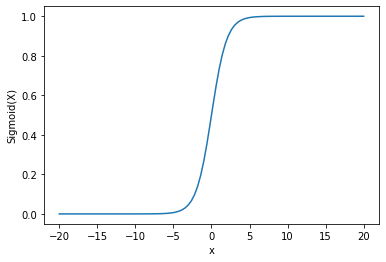

In [ ]:
#La courbe de la fonction sigmoid
x_sig = np.linspace(-20, 20, 100)
z_sig = 1/(1 + np.exp(-x_sig))
plt.plot(x_sig, z_sig)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.show()

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

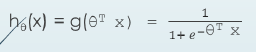

In [ ]:
#la fonction hypothèse
def model(X, theta):
  return 1/(1+np.exp(- (X.dot(theta))))

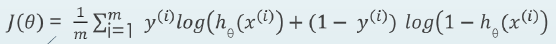

Remarque : il manque un (-) au début de la fonction

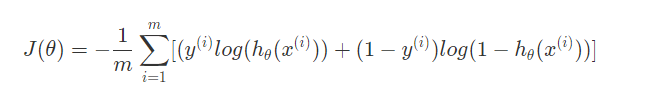

In [ ]:
def computeCost(X, y, theta):
  m = len(y)
  return (-1/m) * np.sum( y * np.log(model(X,theta))  + (1-y) * np.log(1-model(X,theta)))

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

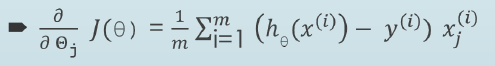

In [ ]:
def Gradient(X,y,theta):
  m = len(y)
  return (1/m) * X.T.dot(model(X,theta) - y)

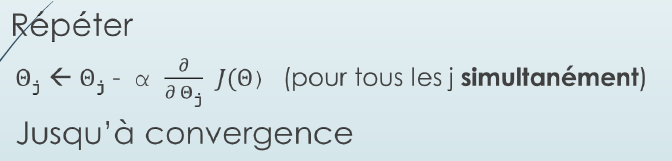

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations):
  costs = np.zeros(iterations)
  for i in range(0, iterations):
        theta = theta - alpha * Gradient(X,y,theta)
        costs[i] = computeCost(X, y, theta)
  return theta , costs


# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta.shape

(3, 1)

Calculer le cout initial

In [ ]:
initialCost=computeCost(X, y, theta)
print(initialCost)

0.6931471805599453


Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
iterations = 4500
alpha = 0.01
# Appel
theta_n , costs_n = gradientDescent(X, y, theta, alpha, iterations)
NewCost=computeCost(X, y, theta_n)
print("L'ancien cout etait = ",initialCost," et le nouveau cout = ", NewCost,"\n")
print("theta = \n",theta_n)

L'ancien cout etait =  0.6931471805599453  et le nouveau cout =  0.47659375155089323 

theta = 
 [[-2.60636592]
 [ 0.14464065]
 [ 0.10420284]]


Traçage de la fonction du coût

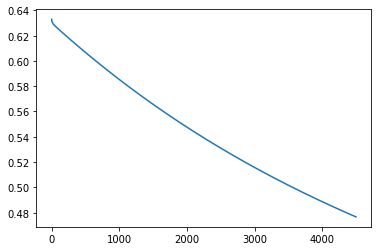

In [ ]:
plt.plot(range(iterations),costs_n)

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

In [ ]:
def drawLine(X,theta):

  return -(theta[0]+X*theta[1])/theta[2]



(100, 3)


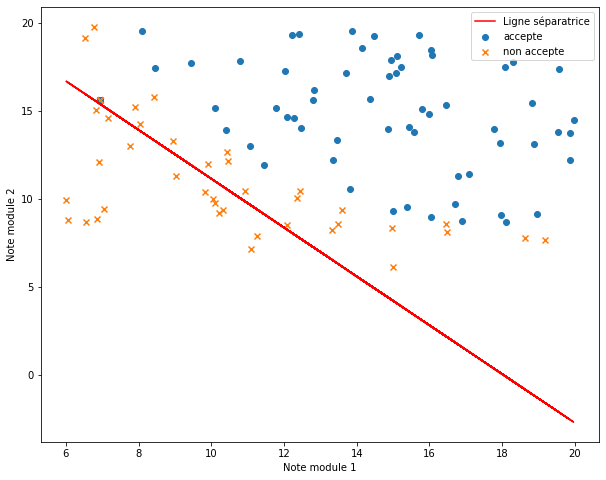

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')
ligne=drawLine(X,theta_n)
print(ligne.shape)
plt.plot(X[:,1],ligne[:,1],label= "Ligne séparatrice",color = "red")
plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
plt.legend()
plt.show()

On remarque bien que la ligne de decision ne separe pas bien nos données !
on va essayer par la suite d'améliorer la qualité de notre model

In [ ]:
# Predire pour des notes note1= 9 et note2=17
Xn=np.array([1,9,17])
print("L'etudiant qui a eu ",Xn[1]," dans le module1 et ",Xn[2]," dans le module2 est à ",model(Xn,theta_n)*100,"% admis")
# Predire pour des notes note1= 9 et note2=10
Xn1=np.array([1,9,10])
print("L'etudiant qui a eu ",Xn1[1]," dans le module1 et ",Xn1[2]," dans le module2 est à ",model(Xn1,theta_n)*100,"% admis")

L'etudiant qui a eu  9  dans le module1 et  17  dans le module2 est à  [61.46374932] % admis
L'etudiant qui a eu  9  dans le module1 et  10  dans le module2 est à  [43.47316344] % admis


# Vérification de l'implementation
##Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression(C=1e2).fit(X[:,1:3],y)
print(clf.intercept_,clf.coef_)

[-25.13440707] [[1.03008411 1.0062491 ]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Consturction du vecteur theta retourné par scikitlearn

In [ ]:
c = np.array(clf.coef_[0][:])
theta_sk = np.array([clf.intercept_ , c[0], c[1]])
theta_sk = theta_sk.reshape(theta_sk.shape[0],1)
print(theta_sk)

[[array([-25.13440707])]
 [1.0300841087736465]
 [1.0062491009236363]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
print("Notre theta: \n",theta_n," \n\n Theta de scikitlearn: \n",theta_sk)

Notre theta: 
 [[-2.60636592]
 [ 0.14464065]
 [ 0.10420284]]  

 Theta de scikitlearn: 
 [[array([-25.13440707])]
 [1.0300841087736465]
 [1.0062491009236363]]


On remarque qu'on a pas obtenue les meme valeurs theta.

##La ligne separatrice de scikitlearn

(100, 3)


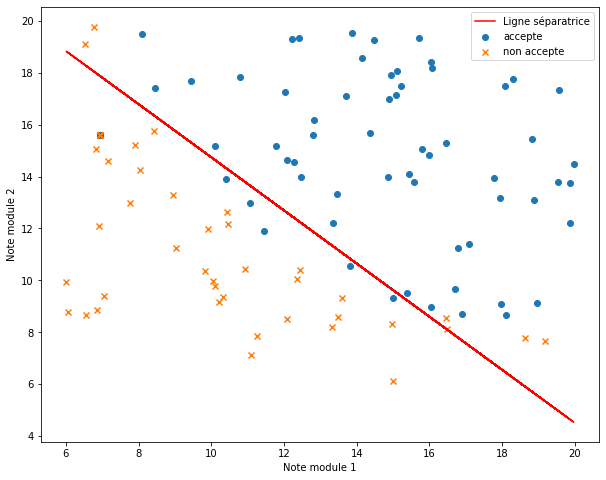

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')
ligne=drawLine(X,theta_sk)
print(ligne.shape)
plt.plot(X[:,1],ligne[:,1],label= "Ligne séparatrice",color = "red")
plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
plt.legend()
plt.show()

#Le Model 3D

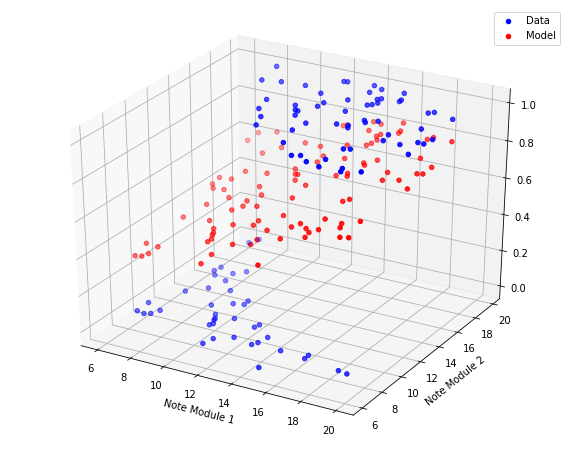

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
plt.figure(figsize=(10,8))
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d' )
ax.scatter(X[:,1],X[:,2],y>0.5, color = "blue",label="Data")
ax.scatter(X[:,1],X[:,2],model(X, theta_n), color="red",label="Model" )
#ax.plot_surface(X[:,1], X[:,2],model(X, theta_n), cmap=cm.coolwarm,
                       #linewidth=0, antialiased=False)
plt.xlabel("Note Module 1")
plt.ylabel("Note Module 2")

plt.legend()


#Le cout en fonction de Theta0 et Theta1

In [ ]:
import plotly.graph_objects as go
def Plot3DCosts(X, y, theta, alpha,iteration):
    # Calculer les teta pour chaque iteration
    X_theta = np.zeros(iteration)
    Y_theta = np.zeros(iteration)
    couts = np.zeros(iteration)
    for i in range(0, iteration):
        X_theta[i] = (theta[0])
        Y_theta[i] = (theta[1])
        ## Calculer la descente de gradient pour une iteration
        theta , couts= gradientDescent(X, y, theta, alpha, 1)

    ## Créer nos matrice pour theta0 et theta1
    X_theta = X_theta[1:]
    Y_theta = Y_theta[1:]
    X_theta = np.array([X_theta[i]  for i in range(0, iteration, 5)])
    Y_theta = np.array([Y_theta[i]  for i in range(0, iteration, 5)])

    X_2D = np.zeros((X_theta.shape[0],X_theta.shape[0]))
    Y_2D = np.zeros((Y_theta.shape[0],Y_theta.shape[0]))
    Z_2D = np.zeros((Y_theta.shape[0],Y_theta.shape[0]))

    # Calculer les couts
    for i in range(X_2D.shape[0]):
        for j in range(X_2D.shape[1]):
            X_2D[i][j] = X_theta[i]
            Y_2D[j][i] = Y_theta[i]

    for i in range(X_2D.shape[0]):
        for j in range(X_2D.shape[1]):
            Z_2D[i][j] = computeCost(X,y , [X_2D[i][j], Y_2D[i][j]])

    fig = go.Figure(data = go.Surface(
    z = Z_2D,
    x = X_2D,
    y = Y_2D
    )
    )

    fig.update_traces(contours_z=dict(show=True, usecolormap = True, project_z=True))
    fig.update_layout(title = "Gradient_Descente", scene = dict(
    xaxis_title="Theta 0",
    yaxis_title="Theta 1",
    zaxis_title="Cost Function Valeus"
    ),
    width = 700,
    height = 700
    )
    fig.show()

In [ ]:
Xn = np.transpose(X.T[1:3])
thetan = theta[:2]


In [ ]:
Plot3DCosts(Xn,y, thetan, 0.01, 2000)

#Amelioration du model

Apres l'effectuation d'une etude de tests avec plusieurs parametres sur notre model, on a obtenue des résultats satisfaisants avec les parametres suivants :

In [ ]:
# paramètres
iterations = 50000
alpha = 0.104
# Appel
theta_am , costs_am = gradientDescent(X, y, theta, alpha, iterations)
NewCostam=computeCost(X, y, theta_am)
print("L'ancien cout etait = ",initialCost," et le nouveau cout = ", NewCostam,"\n")
print("theta = \n",theta_am)

L'ancien cout etait =  0.6931471805599453  et le nouveau cout =  0.20349454121112812 

theta = 
 [[-25.14777288]
 [  1.03062354]
 [  1.00679561]]


(100, 3)


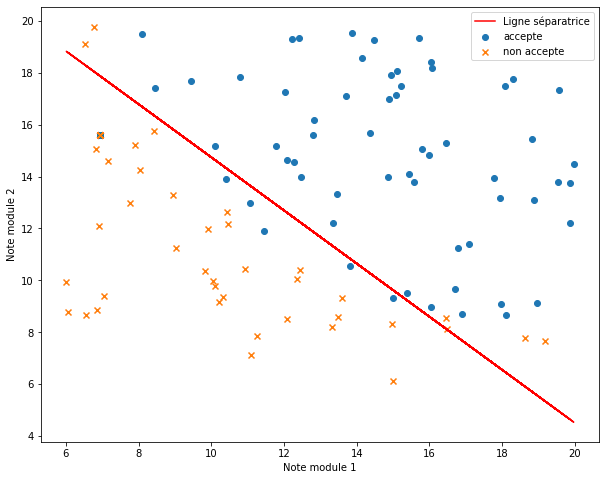

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')
ligne=drawLine(X,theta_am)
print(ligne.shape)
plt.plot(X[:,1],ligne[:,1],label= "Ligne séparatrice",color = "red")
plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
plt.legend()
plt.show()

In [ ]:
yint = np.array(y,dtype=int)

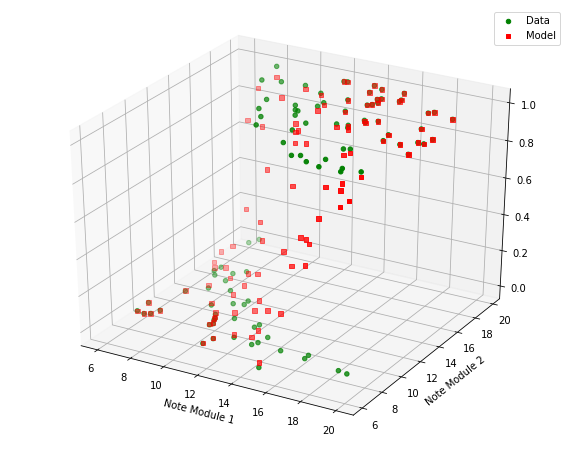

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
plt.figure(figsize=(10,8))
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d' )
ax.scatter(X[:,1],X[:,2],y, c = 'g',label="Data")
ax.scatter(X[:,1],X[:,2],model(X, theta_am), color="red",label="Model", marker = ',' )
#ax.plot_surface(X[:,1], X[:,2],model(X, theta_n), cmap=cm.coolwarm,
                       #linewidth=0, antialiased=False)
plt.xlabel("Note Module 1")
plt.ylabel("Note Module 2")

plt.legend()